# **K Means Clustering (Without Packages)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.datasets import load_digits

# **Load Data**

In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
display(df.shape)
df.info()

(200, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

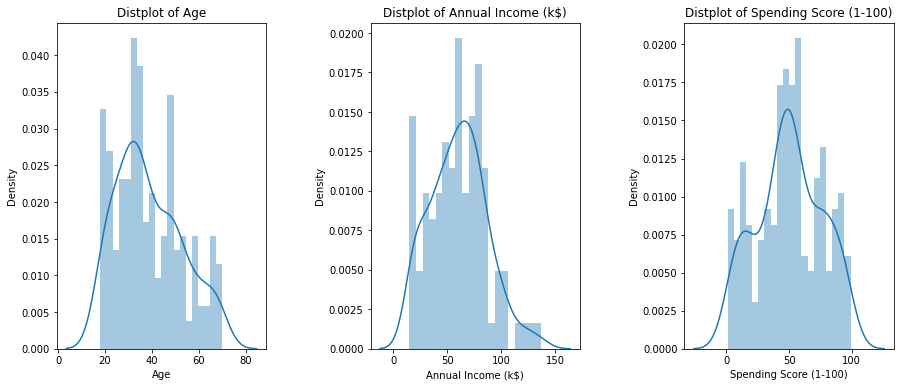

In [6]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

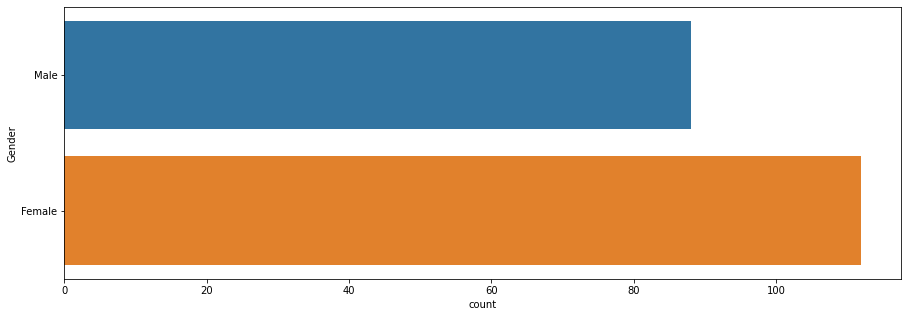

In [7]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

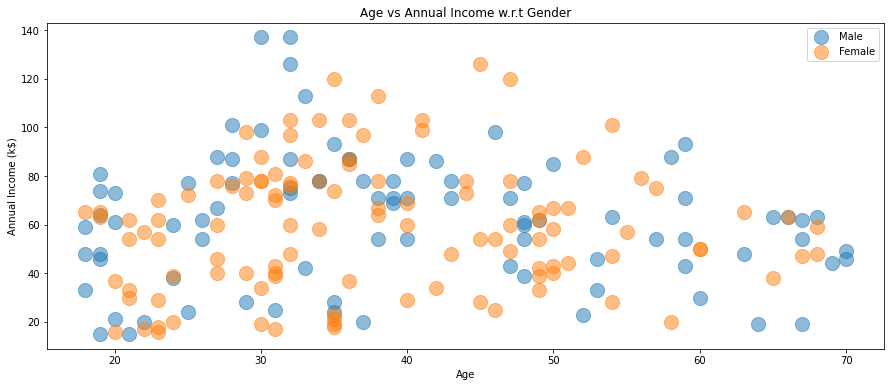

In [8]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

In [9]:
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
 
def _distance(self, a, b):
    return np.sqrt(((a - b)**2).sum())

#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points ,distances,centroids
 

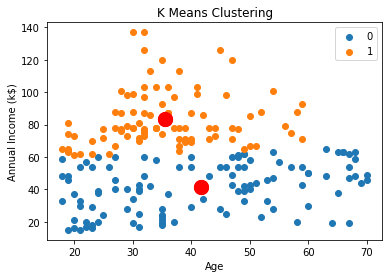

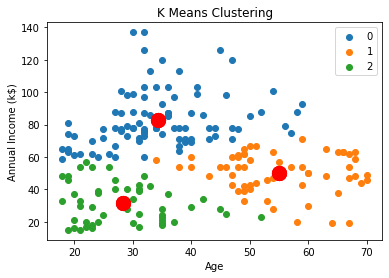

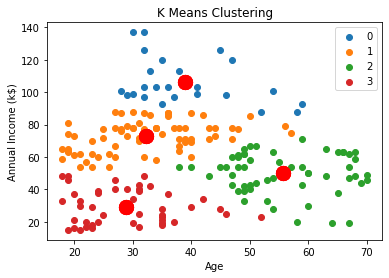

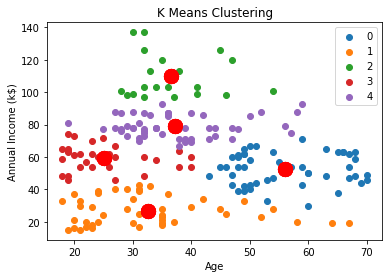

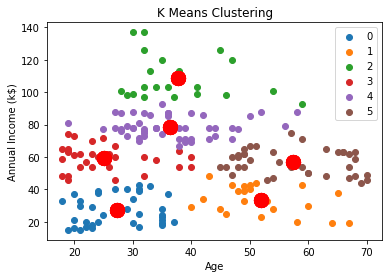

In [10]:
a = np.array(df[['Age','Annual Income (k$)']])
label,distances,centroids = kmeans(a,2,50)
u_labels = np.unique(label)
for i in [2,3,4,5,6]:
  label,distances,centroids = kmeans(a,i,50)
  u_labels = np.unique(label)
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
  for i in u_labels:
      plt.scatter(a[label == i , 0] , a[label == i , 1] , label = i)
      plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 200 , c = 'red' , alpha = 1)
      plt.xlabel("Age")
      plt.ylabel("Annual Income (k$)")
      plt.title("K Means Clustering")
      plt.legend()
  plt.show()

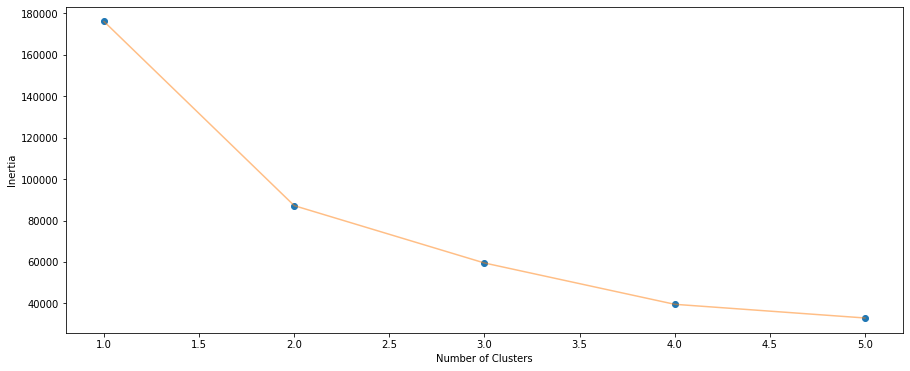

In [11]:
intertia = []
for i in [1,2,3,4,5]:
  sum = 0
  label,distances,c = kmeans(a,i,50)
  for i in range(len(label)):
    sum = sum + distances[i][label[i]]*distances[i][label[i]]
  intertia.append(sum)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 6) , intertia , 'o')
plt.plot(np.arange(1 , 6) , intertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Optional Task We can do PCA**

In [12]:
features = a.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)

explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), explained_variances)

projected_1 = a.dot(vectors.T[0])
projected_2 = a.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res.head()

1.0 [0.22044998251562295, 0.779550017484377]


,PC1,PC2
0,-19.137103,-14.824685
1,-21.137019,-14.806297
2,-20.146255,-15.815449
3,-23.146128,-15.787868
4,-31.154983,-16.714275
